In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic=pd.read_csv("E:/ppts/machine learning/1-eda/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.head()
titanic.info()
titanic.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_cleaned = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
titanic_cleaned.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


C:\Users\lohit\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'Count of Passengers who survived')

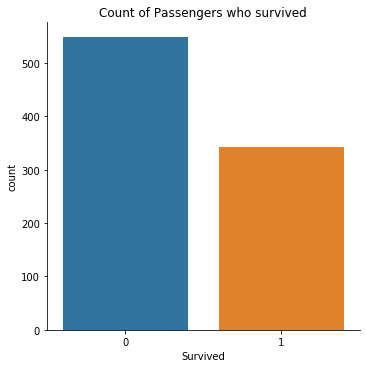

In [18]:
sns.factorplot('Survived', data=titanic, kind='count')
plt.title('Count of Passengers who survived')


Text(0.5, 1.0, 'Agewise distribution of the passenger aboard the Titanic')

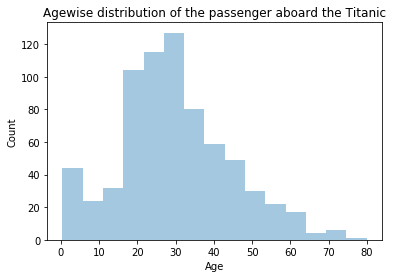

In [17]:
sns.distplot(titanic_cleaned['Age'].dropna(), bins=15, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger aboard the Titanic')


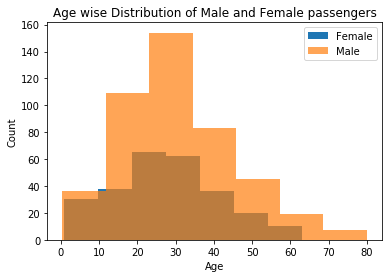

In [21]:
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(titanic_cleaned['Age'][(titanic_cleaned['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()


In [22]:
grouped_by_pclass = titanic_cleaned.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [23]:
titanic_cleaned.groupby(['Pclass', 'Sex']).describe()

Survived                                                 Age  \
                 count      mean       std  min  25%  50%  75%  max  count   
Pclass Sex                                                                   
1      female     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0   85.0   
       male      122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  101.0   
2      female     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   74.0   
       male      108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0   99.0   
3      female    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  102.0   
       male      347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  253.0   

                          ... Parch        Fare                         \
                    mean  ...   75%  max  count        mean        std   
Pclass Sex                ...                                            
1      female  34.611765  ...   1.0  2.0   94.0  106.125798  74.259988   
       male    41.281386  ...   0.0  4.0  122.0   67.226127  77.548021   
2      female  28.722973  ...   1.0  3.0   76.0   21.970121  10.891796   
       male    30.740707  ...   0.0  2.0  108.0   19.741782  14.922235   
3      female  21.750000  ...   1.0  6.0  144.0   16.118810  11.690314   
       male    26.507589  ...   0.0  5.0  347.0   12.661633  11.681696   

                                                                  
                   min       25%       50%         75%       max  
Pclass Sex                                                        
1      female  25.9292  57.24480  82.66455  134.500000  512.3292  
       male     0.0000  27.72810  41.26250   78.459375  512.3292  
2      female  10.5000  13.00000  22.00000   26.062500   65.0000  
       male     0.0000  12.33125  13.00000   26.000000   73.5000  
3      female   6.7500   7.85420  12.47500   20.221875   69.5500  
       male     0.0000   7.75000   7.92500   10.008300   69.5500  

[6 rows x 40 columns]